#### Importing Data
Let us start with importing the basic libraries we need and the data set.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

# sk learn import 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import matplotlib
matplotlib.style.use('ggplot')
pd.options.display.max_rows = 100

In [4]:
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\AibHack\data\training.txt", sep="\t", encoding = 'iso-8859-1')
test = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\AibHack\data\testing.txt", sep="\t", encoding = 'iso-8859-1')

In [5]:
#info for training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464514 entries, 0 to 464513
Columns: 141 entries, BuildingID to EnergyMainWater
dtypes: float64(84), int64(1), object(56)
memory usage: 499.7+ MB


#### Exploring the columns with Permutation and Random Sampling
To select a random subset without replacement, one way is to slice off the k elements of an array returned by permutation, where k is the desired subet size.

In [7]:
sampler = np.random.permutation(5)

In [8]:
train.take(sampler)

,BuildingID,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
3,585961,Co. Cork,Semi-detached house,Y2002.0,Existing,C2,188.17,95.31 sq. m,0.55,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2771.886,3769.6248
1,523113,Co. Clare,Detached house,Y1901.0,Existing,G,520.35,147.44 sq. m,2.01,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7144.838,4470.0759
4,624083,Co. Laois,Detached house,Y2002.0,Existing,B3,134.95,283.87 sq. m,0.55,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5296.5828
0,190835,Co. Wexford,Mid-terrace house,Y1890.0,Existing,F,418.42,52.04 sq. m,2.10,2.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2335.6809
2,271393,Co. Kerry,Detached house,Y1968.0,Existing,D2,281.33,104.84 sq. m,0.38,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2127.347,5837.4729


In [12]:
randomSample = train.take(np.random.permutation(len(train))[:3])

In [13]:
randomSample.T

,112661,212236,234700
BuildingID,223014,554693,311758
County,Co. Carlow,Co. Meath,Co. Cork
Type,Detached house,Semi-detached house,Ground-floor apartment
Year,Y1981.0,Y1970.0,Y2002.0
RatingType,Existing,Existing,Existing
EnergyRatingCat,C2,E1,C2
EnergyRatingCont,192.55,306.47,190.4
GroundFloorArea,256.0 sq. m,86.37 sq. m,nan sq. m
AvgWallU,0.29,1.25,0.55
AvgRoofU,0.13,0.43,0.5


#### 2. Summarize data
Descriptive statistics

In [14]:
#Let's take a brief look at all numerical columns statistcs:
train.describe(include =['number'])

,BuildingID,EnergyRatingCont,AvgWallU,AvgRoofU,AvgFloorU,AvgWindowU,AvgDoorU,ExposedWallArea,ExposedRoofArea,TotFloorArea,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
count,464514.000000,464502.000000,418057.000000,464502.000000,464502.000000,464502.000000,464502.000000,464502.000000,464502.000000,464502.000000,...,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5646.000000,5646.000000,4.127800e+05,4.645020e+05
mean,331771.507537,260.502160,0.681326,0.368432,0.448594,2.766202,2.502561,91.043766,69.081900,66.008098,...,18.690608,5.259694,1.060655,3.697261,0.825863,0.193348,1.427722,0.257974,-6.627683e+05,2.429984e+06
std,191635.334525,208.511406,0.561282,0.495978,0.243910,0.795336,1.012556,52.389315,50.392556,46.193947,...,44.572814,12.437017,0.681459,17.449471,4.149375,1.757735,0.244705,0.090785,3.159458e+06,1.061489e+07
min,2.000000,-63.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.298434e+07,-1.153915e+04
25%,165862.250000,175.280000,0.310000,0.130000,0.340000,2.200000,2.650000,52.560000,41.110000,40.940000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.269000,0.232000,8.584782e+02,2.751271e+03
50%,331791.500000,224.290000,0.520000,0.220000,0.440000,2.760000,3.000000,84.880000,57.410000,56.820000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.444000,0.266000,2.299477e+03,3.622349e+03
75%,497534.250000,299.120000,0.610000,0.400000,0.610000,3.100000,3.000000,111.160000,89.650000,86.090000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.540000,0.298000,3.862553e+03,4.742463e+03
max,663592.000000,56423.710000,5.650000,7.000000,7.760000,6.000000,8.600000,1138.800000,932.870000,884.730000,...,303.200000,88.000000,28.000000,100.000000,41.000000,35.000000,3.818000,0.823000,2.896878e+06,1.447091e+08


In [15]:
#And for categorical columns:
train.describe(include=['object', 'category'])

,County,Type,Year,RatingType,EnergyRatingCat,GroundFloorArea,MainSHFuel,MainWHFuel,SharedMPRN,DLobby,...,SecondEnerTypeDescr,ProdSecondEnerComment,ProdSecondEnerDelivered,ProdSecondEnerConvFac,ConsSecondEnerComment,ThirdEnerTypeDescr,ProdThirdEnerComment,ProdThirdEnerDelivered,ProdThirdEnerConvFac,ConsThirdEnerComment
count,464502,464502,464514,464502,464502,464514,458856,458856,464502,464502,...,457390,205,457388.0,457390.0,45.0,457390,105,457388.0,457390.0,22.0
unique,55,11,249,3,15,30695,19,20,2,2,...,5,84,63.0,14.0,16.0,5,31,15.0,7.0,4.0
top,Co. Cork,Detached house,Y2006.0,Existing,D1,nan sq. m,Heating Oil,Heating Oil,NO,NO,...,Renewable Thermal,PV e/w 30deg 4 panels 709,0.0,0.0,0.0,Renewable Thermal,PV e/w 30deg 2 panels 354,0.0,0.0,0.0
freq,42489,122432,23877,428955,61134,46172,179258,177903,461398,370781,...,456648,19,437127.0,441078.0,16.0,456784,26,437204.0,441187.0,18.0


In [16]:
#check for duplicates
# Check for duplicates
idsUnique = len(set(train.index))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")


There are 0 duplicate IDs for 464514 total entries


In [13]:
train[(train['EnergyRatingCat'].isnull())]

,BuildingID,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
11708,66956,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23821,413423,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61157,92328,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82063,68216,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111091,415824,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140098,416368,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144394,90347,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202716,417267,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213631,68842,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221437,67040,NaN,NaN,Ynan,NaN,NaN,NaN,nan sq. m,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train = train[pd.notnull(train['EnergyRatingCat'])]

In [8]:
train[(train['EnergyRatingCat'].isnull())]

,BuildingID,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater


In [9]:
import re
missing_values = []
nonumeric_values = []

print ("TRAIN SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 17):
        print("~~Listing up to 17 unique values~~")
    print (uniq[0:17])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAIN SET INFORMATION

'BuildingID' has 464502 unique values
~~Listing up to 17 unique values~~
[190835 523113 271393 585961 624083  30231 350444 592196 365924 303002
 634938 300824 449623 379988  68299 597104 163298]

-----------------------------------------------------------------------

'County' has 55 unique values
~~Listing up to 17 unique values~~
['Co. Wexford' 'Co. Clare' 'Co. Kerry' 'Co. Cork' 'Co. Laois' 'Cork City'
 'Co. Carlow' 'Co. Offaly' 'Co. Donegal' 'Co. Meath' 'Co. Cavan' 'Dublin 4'
 'Co. Galway' 'Dublin 14' 'Dublin 6' 'Co. Roscommon' 'Dublin 17']

-----------------------------------------------------------------------

'Type' has 11 unique values
['Mid-terrace house' 'Detached house' 'Semi-detached house'
 'Ground-floor apartment' 'Mid-floor apartment' 'End of terrace house'
 'Top-floor apartment' 'House' 'Maisonette' 'Apartment' 'Basement Dwelling']

-----------------------------------------------------------------------

'Year' has 248 unique values
~~Listing up t

#### Data Visualization

In [5]:
cats = []
for col in train.columns.values:
    if train[col].dtype == 'object':
        cats.append(col)

In [6]:
df_cont = train.drop(cats, axis=1)
df_cat = train[cats]


In [11]:
df_cat.columns

Index(['County', 'Type', 'Year', 'RatingType', 'EnergyRatingCat',
       'GroundFloorArea', 'MainSHFuel', 'MainWHFuel', 'SharedMPRN', 'DLobby',
       'VentMethod', 'WallStructure', 'SuspWoodFloor', 'PermTest',
       'BoilerStat1', 'BoilerStat2', 'OilPumpIn', 'WarmAir', 'Underfloor',
       'StorageLoss', 'DeclaredLoss', 'SolarWaterHeating', 'SummerElectricImm',
       'Combi', 'KeepHot', 'HWInsulationType', 'PrimaryLoss',
       'CylinderThermostat', 'CombiCylinder', 'SolarPumpPower', 'Charging',
       'MainSpaceEnergy', 'MassCat', 'LargestRoofType', 'PercLowEnergy',
       'TotEnergy', 'SecSpaceEnergy', 'PercLivingArea', 'RatingPurpose',
       'AssessmentDate', 'FirstEnerType', 'FirstEnerTypeDescr',
       'ProdFirstEnerComment', 'ProdFirstEnerDelivered',
       'ProdFirstEnerConvFac', 'ConsFirstEnerComment', 'SecondEnerTypeDescr',
       'ProdSecondEnerComment', 'ProdSecondEnerDelivered',
       'ProdSecondEnerConvFac', 'ConsSecondEnerComment', 'ThirdEnerTypeDescr',
       'ProdT

In [10]:
df_cont.columns

Index(['BuildingID', 'EnergyRatingCont', 'AvgWallU', 'AvgRoofU', 'AvgFloorU',
       'AvgWindowU', 'AvgDoorU', 'ExposedWallArea', 'ExposedRoofArea',
       'TotFloorArea', 'TotWindowArea', 'TotDoorArea', 'NStoreys',
       'MainSHEfficiency', 'BuildingReg', 'MainSHAdj', 'SecSHFrac',
       'SecSHEfficiency', 'MainWHEfficiency', 'MainWHAdj', 'SecSHFuel',
       'SecWHFuel', 'NChimneys', 'NOpenFlues', 'NFansVents',
       'PercDraughtStripped', 'NShelteredSides', 'PermTestResult', 'TempAdj',
       'ControlCat', 'ResponseCat', 'NCHPumps', 'NGasFans', 'DistLoss',
       'VolWaterStorage', 'TempFac', 'TempFacMult', 'HWInsulationThickness',
       'AreaAperture', 'ZeroLossCollEff', 'CollHeatLoss', 'SolarRadiation',
       'Overshading', 'DedicatedSolarVol', 'SolarPumpElect', 'SolarHeatFrac',
       'LightingEnergy', 'PumpsAndFansEnergy', 'MainWaterEnergy',
       'PrimaryLightingEnergy', 'PrimaryPumpsFansEnergy',
       'PrimaryMainWaterEnergy', 'PrimaryMainSpaceEnergy', 'LightingCO2',
    

In [12]:
# Handle missing values for features where median/mean or most common value doesn't make sense

train.loc[:, "MainSHFuel"] = train.loc[:, "MainSHFuel"].fillna("None")

train.loc[:, "AvgWallU"] = train.loc[:, "AvgWallU"].fillna(0)

train.loc[:, "MainWHFuel"] = train.loc[:, "MainWHFuel"].fillna("No")
train.loc[:, "MainSHEfficiency"] = train.loc[:, "MainSHEfficiency"].fillna("No")
train.loc[:, "MainSHAdj"] = train.loc[:, "MainSHAdj"].fillna(train['MainSHAdj'].median())


In [14]:
#train.loc[:, "Main"] = train.loc[:, "MainSHFuel"].fillna("None")

#train.loc[:, "AvgWallU"] = train.loc[:, "AvgWallU"].fillna(0)

#train.loc[:, "MainWHFuel"] = train.loc[:, "MainWHFuel"].fillna("No")
#train.loc[:, "MainSHEfficiency"] = train.loc[:, "MainSHEfficiency"].fillna("No")
train.loc[:, "SecSHFrac"] = train.loc[:, "SecSHFrac"].fillna(train['MainSHAdj'].median())
train.loc[:, "SecSHEfficiency"] = train.loc[:, "SecSHEfficiency"].fillna(train['SecSHEfficiency'].median())
train.loc[:, "MainWHEfficiency"] = train.loc[:, "MainWHEfficiency"].fillna(train['MainWHEfficiency'].median())
train.loc[:, "SecSHEfficiency"] = train.loc[:, "SecSHEfficiency"].fillna(train['SecSHEfficiency'].median())
train.loc[:, "SecSHFrac"] = train.loc[:, "SecSHFrac"].fillna(train['SecSHFrac'].median())
train.loc[:, "MainWHAdj"] = train.loc[:, "MainWHAdj"].fillna(train['MainWHAdj'].median())
train.loc[:, "SecSHFuel"] = train.loc[:, "SecSHFuel"].fillna(train['SecSHFuel'].median())
train.loc[:, "SecWHFuel"] = train.loc[:, "SecWHFuel"].fillna(train['SecWHFuel'].median())
train.loc[:, "SecSHFrac"] = train.loc[:, "SecSHFrac"].fillna(train['SecSHFrac'].median())
train.loc[:, "TempAdj"] = train.loc[:, "TempAdj"].fillna(train['TempAdj'].median())


In [19]:
#drop columns
del train['StorageLoss']
del train['DeclaredLoss']
del train['SolarWaterHeating']
del train['SummerElectricImm']
del train['Combi']
del train['KeepHot']
del train['VolWaterStorage']
del train['TempFac']
del train['TempFacMult']
del train['HWInsulationType']
del train['HWInsulationThickness']
del train['AreaAperture']
del train['ZeroLossCollEff']
del train['CollHeatLoss']

In [20]:
#drop columns 458880
del train['SolarRadiation']
del train['Overshading']
del train['DedicatedSolarVol']
del train['SolarPumpElect']
del train['SolarHeatFrac']
del train['LargestRoofTypeArea']
del train['LargestRoofType']
del train['SecSpacePrimaryEnergy']
del train['FuelTypeFirstBoiler']
del train['EffFirstHeatGenPlant']
del train['PercFirstHeat']
del train['FuelTypeSecondBoiler']
del train['FuelTypeThirdBoiler']
del train['EffThirdHeatGenPlant']
del train['PercThirdHeat']
del train['HeatingSystemSolarSpace']
del train['TotPrimaryEnergyFac']
#del train['HeatingSystemSolarSpace']
#del train['TotPrimaryEnergyFac']

In [17]:
train.loc[:, "FirstEnerType"] = train.loc[:, "FirstEnerType"].fillna("None")
train.loc[:, "FirstEnerTypeDescr"] = train.loc[:, "FirstEnerTypeDescr"].fillna("None")
train.loc[:, "FirstEnerType"] = train.loc[:, "FirstEnerType"].fillna("None")
train.loc[:, "FirstEnerTypeDescr"] = train.loc[:, "FirstEnerTypeDescr"].fillna("None")
train.loc[:, "FirstEnerType"] = train.loc[:, "FirstEnerType"].fillna("None")
train.loc[:, "FirstEnerTypeDescr"] = train.loc[:, "FirstEnerTypeDescr"].fillna("None")

train.loc[:, "PercLowEnergy"] = train.loc[:, "PercLowEnergy"].fillna("No")
train.loc[:, "ProdSecondEnerConvFac"] = train.loc[:, "ProdSecondEnerConvFac"].fillna("No")
train.loc[:, "ConsSecondEnerComment"] = train.loc[:, "ConsSecondEnerComment"].fillna("No")
train.loc[:, "SecondEnerTypeDescr"] = train.loc[:, "SecondEnerTypeDescr"].fillna("No")
train.loc[:, "ProdSecondEnerComment"] = train.loc[:, "ProdSecondEnerComment"].fillna("No")
train.loc[:, "ProdSecondEnerDelivered"] = train.loc[:, "ProdSecondEnerDelivered"].fillna("No")

#train.loc[:, "AvgWallU"] = train.loc[:, "AvgWallU"].fillna(0)
train.loc[:, "ProdFirstEnerComment"] = train.loc[:, "ProdFirstEnerComment"].fillna("No")
train.loc[:, "ProdFirstEnerDelivered"] = train.loc[:, "ProdFirstEnerDelivered"].fillna("No")
train.loc[:, "ProdFirstEnerConvFac"] = train.loc[:, "ProdFirstEnerConvFac"].fillna("No")
train.loc[:, "ConsFirstEnerComment"] = train.loc[:, "ConsFirstEnerComment"].fillna("No")
#train.loc[:, "MainSHEfficiency"] = train.loc[:, "MainSHEfficiency"].fillna("No")
train.loc[:, "PrimaryMainWaterEnergy"] = train.loc[:, "PrimaryMainWaterEnergy"].fillna(train['PrimaryMainWaterEnergy'].median())
train.loc[:, "PrimaryMainSpaceEnergy"] = train.loc[:, "PrimaryMainSpaceEnergy"].fillna(train['PrimaryMainSpaceEnergy'].median())
train.loc[:, "MainWaterCO2"] = train.loc[:, "MainWaterCO2"].fillna(train['MainWaterCO2'].median())
train.loc[:, "MainSpaceCO2"] = train.loc[:, "MainSpaceCO2"].fillna(train['MainSpaceCO2'].median())
train.loc[:, "SecSHFrac"] = train.loc[:, "SecSHFrac"].fillna(train['SecSHFrac'].median())
#train.loc[:, "PercLowEnergy"] = train.loc[:, "PercLowEnergy"].fillna(train['PercLowEnergy'].median())
#train.loc[:, "SecSpaceEnergy"] = train.loc[:, "SecSpaceEnergy"].fillna(train['SecSpaceEnergy'].median())
train.loc[:, "SecWaterEnergy"] = train.loc[:, "SecWaterEnergy"].fillna(train['SecWaterEnergy'].median())
train.loc[:, "SecSHFrac"] = train.loc[:, "SecSHFrac"].fillna(train['SecSHFrac'].median())
train.loc[:, "TempAdj"] = train.loc[:, "TempAdj"].fillna(train['TempAdj'].median())


In [22]:
train.loc[:, "ConsThirdEnerComment"] = train.loc[:, "ConsThirdEnerComment"].fillna("No")
#train.loc[:, "ProdThirdEnerConvFac"] = train.loc[:, "ProdThirdEnerConvFac"].fillna("No")


train.loc[:, "SecSpaceEnergy"] = train.loc[:, "SecSpaceEnergy"].fillna("No")
train.loc[:, "ThirdEnerTypeDescr"] = train.loc[:, "ThirdEnerTypeDescr"].fillna("No")
train.loc[:, "ProdThirdEnerComment"] = train.loc[:, "ProdThirdEnerComment"].fillna("No")
train.loc[:, "ProdThirdEnerDelivered"] = train.loc[:, "ProdThirdEnerDelivered"].fillna("No")
train.loc[:, "ProdThirdEnerConvFac"] = train.loc[:, "ProdThirdEnerConvFac"].fillna("No")
#train.loc[:, "AvgWallU"] = train.loc[:, "AvgWallU"].fillna(0)
train.loc[:, "TotCO2Emissions"] = train.loc[:, "TotCO2Emissions"].fillna(train['TotCO2Emissions'].median())
train.loc[:, "PrimaryEnergySecondarySpace"] = train.loc[:, "PrimaryEnergySecondarySpace"].fillna(train['TotCO2Emissions'].median())
#train.loc[:, "ProdFirstEnerConvFac"] = train.loc[:, "ProdFirstEnerConvFac"].fillna("No")
#train.loc[:, "ConsFirstEnerComment"] = train.loc[:, "ConsFirstEnerComment"].fillna("No")

TypeError: could not convert string to float: 'No'

In [25]:
#del train['PrimaryLoss']
#del train['EffSecondHeatGenPlant']
#del train['PercSecondHeat']
#del train['TotCO2Emissions']
#del train['PrimaryEnergySecondarySpace']
#train.loc[:, "ProdThirdEnerConvFac"] = train.loc[:, "ProdThirdEnerConvFac"].fillna("No")
train.loc[:, "TotEnergy"] = train.loc[:, "TotEnergy"].fillna('No')
#train.loc[:, "TotEnergy"] = train.loc[:, "TotEnergy"].fillna(train['TotEnergy'].median())
train.loc[:, "SecSpaceCO2"] = train.loc[:, "SecSpaceCO2"].fillna(train['SecSpaceCO2'].median())

In [26]:
import re
missing_values = []
nonumeric_values = []

print ("TRAIN SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 17):
        print("~~Listing up to 17 unique values~~")
    print (uniq[0:17])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAIN SET INFORMATION

'BuildingID' has 464502 unique values
~~Listing up to 17 unique values~~
[190835 523113 271393 585961 624083  30231 350444 592196 365924 303002
 634938 300824 449623 379988  68299 597104 163298]

-----------------------------------------------------------------------

'County' has 55 unique values
~~Listing up to 17 unique values~~
['Co. Wexford' 'Co. Clare' 'Co. Kerry' 'Co. Cork' 'Co. Laois' 'Cork City'
 'Co. Carlow' 'Co. Offaly' 'Co. Donegal' 'Co. Meath' 'Co. Cavan' 'Dublin 4'
 'Co. Galway' 'Dublin 14' 'Dublin 6' 'Co. Roscommon' 'Dublin 17']

-----------------------------------------------------------------------

'Type' has 11 unique values
['Mid-terrace house' 'Detached house' 'Semi-detached house'
 'Ground-floor apartment' 'Mid-floor apartment' 'End of terrace house'
 'Top-floor apartment' 'House' 'Maisonette' 'Apartment' 'Basement Dwelling']

-----------------------------------------------------------------------

'Year' has 248 unique values
~~Listing up t

#### Plotting Univariate Variables

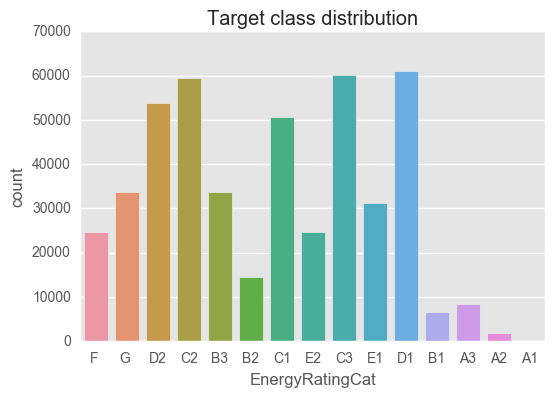

In [9]:
#See target class distribution
ax = plt.axes()
sns.countplot(x='EnergyRatingCat', data=train, ax=ax);
ax.set_title('Target class distribution')
plt.show()

#### Numerical Variables

In [31]:
df_cont.columns

Index(['BuildingID', 'EnergyRatingCont', 'AvgRoofU', 'AvgFloorU', 'AvgWindowU',
       'AvgDoorU', 'ExposedWallArea', 'ExposedRoofArea', 'TotFloorArea',
       'TotWindowArea', 'TotDoorArea', 'NStoreys', 'BuildingReg', 'MainSHAdj',
       'SecSHFrac', 'SecSHEfficiency', 'MainWHEfficiency', 'MainWHAdj',
       'SecSHFuel', 'SecWHFuel', 'NChimneys', 'NOpenFlues', 'NFansVents',
       'PercDraughtStripped', 'NShelteredSides', 'PermTestResult', 'TempAdj',
       'ControlCat', 'ResponseCat', 'NCHPumps', 'NGasFans', 'DistLoss',
       'LightingEnergy', 'PumpsAndFansEnergy', 'MainWaterEnergy',
       'PrimaryLightingEnergy', 'PrimaryPumpsFansEnergy',
       'PrimaryMainWaterEnergy', 'LightingCO2', 'PumpsAndFansCO2',
       'MainWaterCO2', 'MainSpaceCO2', 'AreaGroundFloor', 'HeightGroundFloor',
       'AreaFirstFloor', 'HeightFirstFloor', 'AreaSecondFloor', 'BridgingFac',
       'SecWaterEnergy', 'SecSpaceCO2', 'SecWaterCO2', 'SecWaterPrimaryEnergy',
       'UpgradeHES', 'RoofAreaRoom', 'Energ

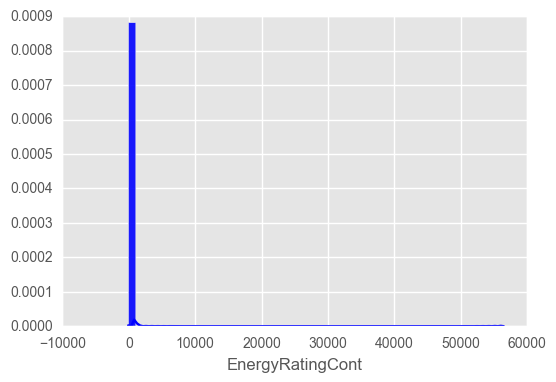

In [17]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['EnergyRatingCont'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

#### Looks very skewed.. needs to be log

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A06970748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A0797C9B0>]], dtype=object)

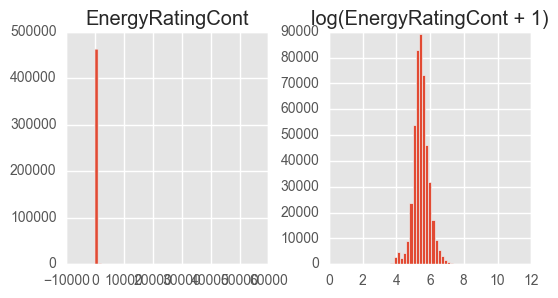

In [18]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"EnergyRatingCont":train["EnergyRatingCont"], "log(EnergyRatingCont + 1)":np.log1p(train["EnergyRatingCont"])})
prices.hist(bins = 50)

###### TotFloorArea

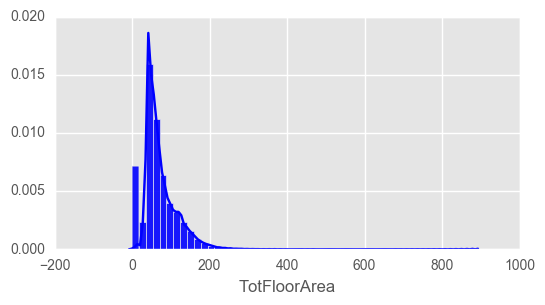

In [19]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['TotFloorArea'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

##### Most of the data seems skewed.. Let us check the skewness

In [32]:
print(train.skew())

BuildingID                       0.000320
EnergyRatingCont                90.929306
AvgWallU                         1.611350
AvgRoofU                         2.924161
AvgFloorU                        0.021778
AvgWindowU                       0.966093
AvgDoorU                        -1.654310
ExposedWallArea                  1.758479
ExposedRoofArea                  1.594331
TotFloorArea                     1.410522
TotWindowArea                    8.378871
TotDoorArea                    118.693617
NStoreys                         0.162846
MainSHEfficiency                 8.163963
BuildingReg                      3.727787
MainSHAdj                       -2.760850
SecSHFrac                       -0.336434
SecSHEfficiency                  0.735372
MainWHEfficiency                 8.347600
MainWHAdj                       -7.463469
SecSHFuel                      237.713908
SecWHFuel                        0.319633
NChimneys                        1.826319
NOpenFlues                       2

##### NStoreys 

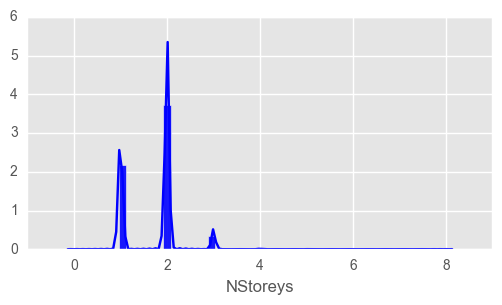

In [21]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['NStoreys'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

#### SecWaterEnergy  

In [22]:
train[(train['SecWaterEnergy'].isnull())]

,BuildingID,County,Type,Year,RatingType,EnergyRatingCat,EnergyRatingCont,GroundFloorArea,AvgWallU,AvgRoofU,...,EffSecondHeatGenPlant,PercSecondHeat,FuelTypeThirdBoiler,EffThirdHeatGenPlant,PercThirdHeat,HeatingSystemSolarSpace,TotPrimaryEnergyFac,TotCO2Emissions,PrimaryEnergySecondarySpace,EnergyMainWater
158749,416367,Co. Dublin,End of terrace house,Y1934.0,Existing,F,443.73,70.12 sq. m,2.26,1.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669.857,2426.8392


In [23]:
train = train[pd.notnull(train['SecWaterEnergy'])]

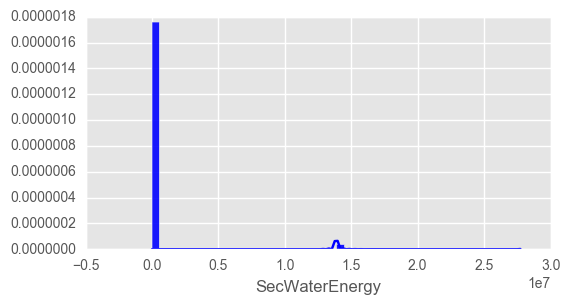

In [24]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['SecWaterEnergy'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

#### BuildingReg 

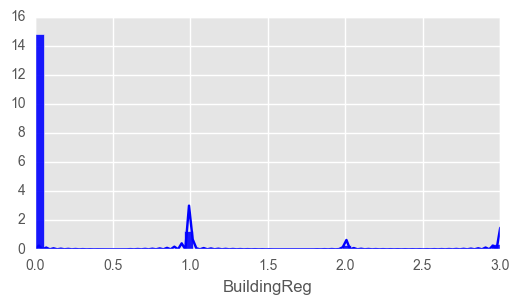

In [25]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['BuildingReg'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

###### UpgradeHES

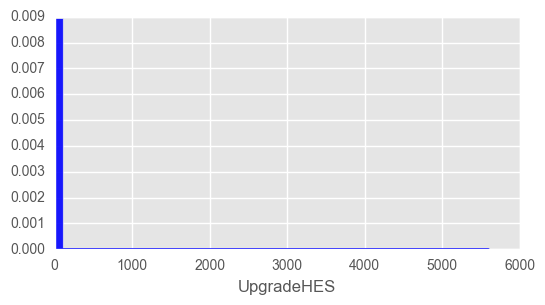

In [26]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['UpgradeHES'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

Index(['County', 'Type', 'Year', 'RatingType', 'EnergyRatingCat',
       'GroundFloorArea', 'MainSHFuel', 'MainWHFuel', 'SharedMPRN', 'DLobby',
       'VentMethod', 'WallStructure', 'SuspWoodFloor', 'PermTest',
       'BoilerStat1', 'BoilerStat2', 'OilPumpIn', 'WarmAir', 'Underfloor',
       'StorageLoss', 'DeclaredLoss', 'SolarWaterHeating', 'SummerElectricImm',
       'Combi', 'KeepHot', 'HWInsulationType', 'PrimaryLoss',
       'CylinderThermostat', 'CombiCylinder', 'SolarPumpPower', 'Charging',
       'MainSpaceEnergy', 'MassCat', 'LargestRoofType', 'PercLowEnergy',
       'TotEnergy', 'SecSpaceEnergy', 'PercLivingArea', 'RatingPurpose',
       'AssessmentDate', 'FirstEnerType', 'FirstEnerTypeDescr',
       'ProdFirstEnerComment', 'ProdFirstEnerDelivered',
       'ProdFirstEnerConvFac', 'ConsFirstEnerComment', 'SecondEnerTypeDescr',
       'ProdSecondEnerComment', 'ProdSecondEnerDelivered',
       'ProdSecondEnerConvFac', 'ConsSecondEnerComment', 'ThirdEnerTypeDescr',
       'ProdT

In [ ]:
categorial_cols = [
    'County', 'Type', 'Year', 'RatingType', 'EnergyRatingCat',
       'GroundFloorArea', 'MainSHFuel', 'MainWHFuel', 'SharedMPRN', 'DLobby',
       'VentMethod', 'WallStructure', 'SuspWoodFloor', 'PermTest',
       'BoilerStat1', 'BoilerStat2', 'OilPumpIn', 'WarmAir', 'Underfloor',
       'StorageLoss', 'DeclaredLoss', 'SolarWaterHeating', 'SummerElectricImm',
       'Combi', 'KeepHot', 'HWInsulationType', 'PrimaryLoss',
       'CylinderThermostat', 'CombiCylinder', 'SolarPumpPower', 'Charging',
       'MainSpaceEnergy', 'MassCat', 'LargestRoofType', 'PercLowEnergy',
       'TotEnergy', 'SecSpaceEnergy', 'PercLivingArea', 'RatingPurpose',
       'AssessmentDate', 'FirstEnerType', 'FirstEnerTypeDescr',
       'ProdFirstEnerComment', 'ProdFirstEnerDelivered',
       'ProdFirstEnerConvFac', 'ConsFirstEnerComment', 'SecondEnerTypeDescr',
       'ProdSecondEnerComment', 'ProdSecondEnerDelivered',
       'ProdSecondEnerConvFac', 'ConsSecondEnerComment', 'ThirdEnerTypeDescr',
       'ProdThirdEnerComment', 'ProdThirdEnerDelivered',
       'ProdThirdEnerConvFac', 'ConsThirdEnerComment']

for cc in categorial_cols:
    dummies = pd.get_dummies(data_cl[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    data_cl.drop(cc, axis=1, inplace=True)
    data_cl = data_cl.join(dummies)